In [1]:
import cv2

In [2]:
!pip install opencv-python

In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [4]:
import os
os.chdir('C:\\Users\\user 13\\Downloads\\MBM_data\\MBM_data')

In [5]:
from PIL import Image
pic=Image.open('histological.png')

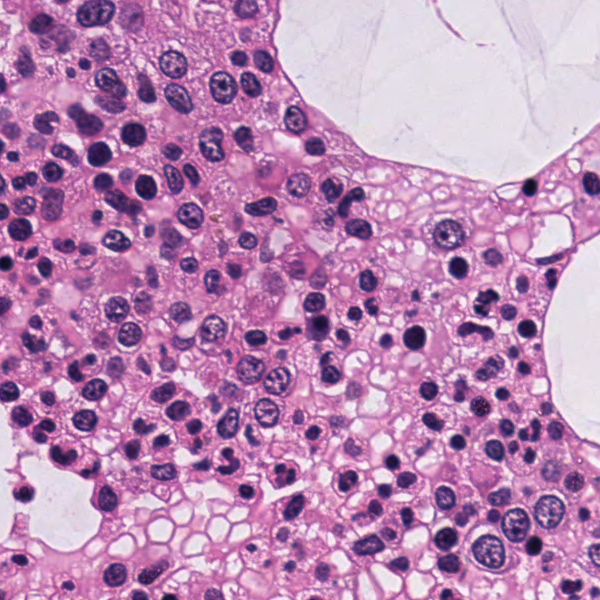

In [6]:
pic

In [7]:
type(pic)

PIL.PngImagePlugin.PngImageFile

In [8]:
pic_arr=np.asarray(pic)

In [9]:
print(pic_arr)

[[[221 172 201]
  [200 142 191]
  [173 115 164]
  ...
  [227 221 231]
  [225 219 229]
  [224 218 228]]

 [[243 200 219]
  [234 177 222]
  [201 144 189]
  ...
  [228 220 231]
  [227 219 230]
  [225 219 229]]

 [[252 211 229]
  [250 193 236]
  [208 151 194]
  ...
  [230 222 233]
  [229 221 232]
  [227 221 231]]

 ...

 [[ 92  39 103]
  [101  48 112]
  [104  51 115]
  ...
  [168 113 170]
  [179 124 181]
  [199 134 172]]

 [[ 95  41 103]
  [ 94  45 108]
  [ 97  48 111]
  ...
  [187 127 187]
  [192 132 192]
  [206 138 185]]

 [[101  43 102]
  [ 87  45 105]
  [ 90  48 108]
  ...
  [204 140 201]
  [207 143 204]
  [210 145 199]]]


In [10]:
print(pic_arr.shape)

(600, 600, 3)


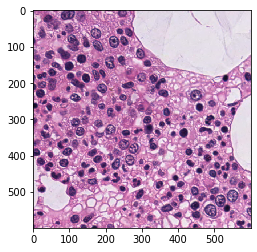

In [11]:
plt.imshow(pic_arr)

In [12]:
pic_red=pic_arr.copy()

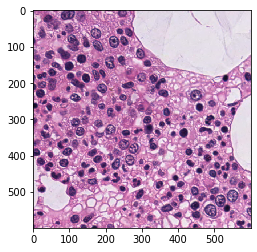

In [13]:
plt.imshow(pic_red)


In [14]:
pic_red[0]

array([[221, 172, 201],
       [200, 142, 191],
       [173, 115, 164],
       ...,
       [227, 221, 231],
       [225, 219, 229],
       [224, 218, 228]], dtype=uint8)

In [15]:
pic_red[:,:,0]

array([[221, 200, 173, ..., 227, 225, 224],
       [243, 234, 201, ..., 228, 227, 225],
       [252, 250, 208, ..., 230, 229, 227],
       ...,
       [ 92, 101, 104, ..., 168, 179, 199],
       [ 95,  94,  97, ..., 187, 192, 206],
       [101,  87,  90, ..., 204, 207, 210]], dtype=uint8)

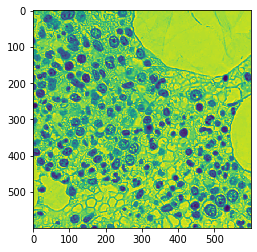

In [16]:
#RED Chennel
plt.imshow(pic_arr[:,:,0])

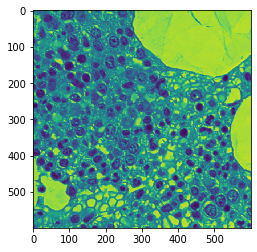

In [17]:
#GREEN Channel
plt.imshow(pic_arr[:,:,1])

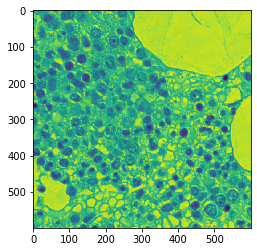

In [18]:
#BLUE Channel
plt.imshow(pic_arr[:,:,2])

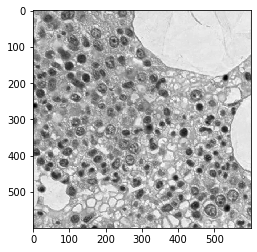

In [19]:
plt.imshow(pic_arr[:,:,2],cmap='gray')

In [20]:
if(pic_red[:,:,1].any()<255):
    print("yes")

yes


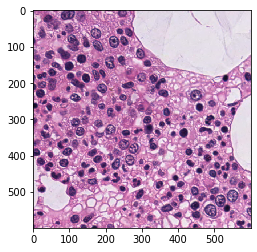

In [21]:
plt.imshow(pic_red)

In [22]:
img=cv.imread('histological.png',0)

In [23]:
type(img)

numpy.ndarray

In [56]:
th,binary_img=cv.threshold(pic_arr[:,:,2],127,255,cv.THRESH_BINARY)

In [61]:
#gray = cv2.cvtColor(binary_img, cv2.COLOR_BGR2GRAY)
binary_img[0]

array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255,   0,   0,   0,   0, 255, 255,   0,
         0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 25

Text(0.5, 1.0, 'Binary Image')

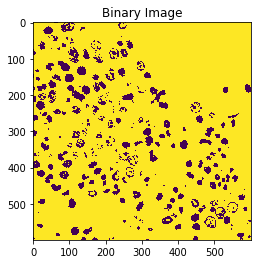

In [62]:
plt.imshow(binary_img)
plt.title("Binary Image")

In [63]:
#threshold applied array of  binary image
print(binary_img)
type(binary_img)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]


numpy.ndarray

In [27]:
#applying morphological opration(opening) on binary image

In [64]:
  # defining the kernel i.e. Structuring element 
kernel=cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))

In [65]:
opening_img =cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, kernel)

In [66]:
type(opening_img)

numpy.ndarray

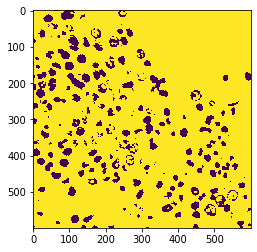

In [67]:
plt.imshow(opening_img)

In [68]:
ret, labels = cv2.connectedComponents(opening_img,connectivity=8)

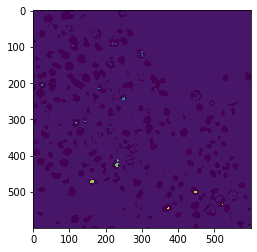

In [69]:
plt.imshow(labels)

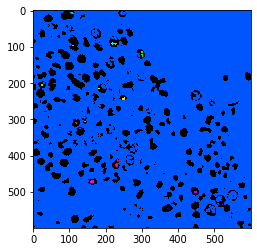

In [70]:
def imshow_components(labels):
    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0
    
    plt.imshow(labeled_img)
    cv2.waitKey()
    
    return labeled_img

labeled_img=imshow_components(labels)

In [74]:
labeled_img[0][0]

array([  0,  85, 255], dtype=uint8)

In [71]:
type(labeled_img)

numpy.ndarray

In [76]:
## findcontours
cnts = cv2.findContours(opening_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2]


## filter by area
s1= 3
s2 = 30
xcnts = []
for cnt in cnts:
    if s1<cv2.contourArea(cnt) <s2:
        xcnts.append(cnt)

print("Total number of Nuclei Cells are: {}".format(len(xcnts)))

Total number of Nuclei Cells are: 95
